# Supplementary Figure 6 - Change Point Detection

In [1]:
cd '/Users/starr/My Drive/Files/Projects/U1475/subproject_repos/SS_Paper/Starr_etal_ACC'

/Users/starr/My Drive/Files/Projects/U1475/subproject_repos/SS_Paper/Starr_etal_ACC


In [3]:
# preamble
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from scipy import signal,stats
from scipy.interpolate import interp1d
from matplotlib import gridspec

import ruptures as rpt



In [8]:
### load external datasets
fileurl = 'https://raw.githubusercontent.com/gibbs-hmm/HMM-Match/master/Prob_stack.txt' # pull prob-stack from the HMM-Stack github repo
prob = pd.read_csv(fileurl,header=None,sep='  ')

## ---- APcomp! ---- ##
apcomp = pd.read_csv('tables/ap_comp_ss.csv')
new = np.arange(3,1880,3)
n = apcomp['dU_dhol_mccave'].notnull()
t = apcomp['LR04_age'][n]
y = apcomp['dU_dhol_mccave'][n]
f = interp1d(t,y,fill_value='extrapolate')
y_l = f(new)


/var/folders/c_/cgbnj8n943z0v0kv5qjmw2s00000gn/T/ipykernel_36983/830643189.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  prob = pd.read_csv(fileurl,header=None,sep='  ')


<>:102: SyntaxWarning: invalid escape sequence '\m'
<>:103: SyntaxWarning: invalid escape sequence '\s'
<>:104: SyntaxWarning: invalid escape sequence '\m'
<>:102: SyntaxWarning: invalid escape sequence '\m'
<>:103: SyntaxWarning: invalid escape sequence '\s'
<>:104: SyntaxWarning: invalid escape sequence '\m'
/var/folders/c_/cgbnj8n943z0v0kv5qjmw2s00000gn/T/ipykernel_36983/2874263882.py:102: SyntaxWarning: invalid escape sequence '\m'
  ax[1].set_ylabel('$\mathrm{\Delta U_{Holocene}}$\n(cm/s)')
/var/folders/c_/cgbnj8n943z0v0kv5qjmw2s00000gn/T/ipykernel_36983/2874263882.py:103: SyntaxWarning: invalid escape sequence '\s'
  ax[2].set_ylabel('Rolling $\sigma$')
/var/folders/c_/cgbnj8n943z0v0kv5qjmw2s00000gn/T/ipykernel_36983/2874263882.py:104: SyntaxWarning: invalid escape sequence '\m'
  ax[3].set_ylabel('$\mathrm{\Delta U_{Holocene}}$\n(cm/s)')


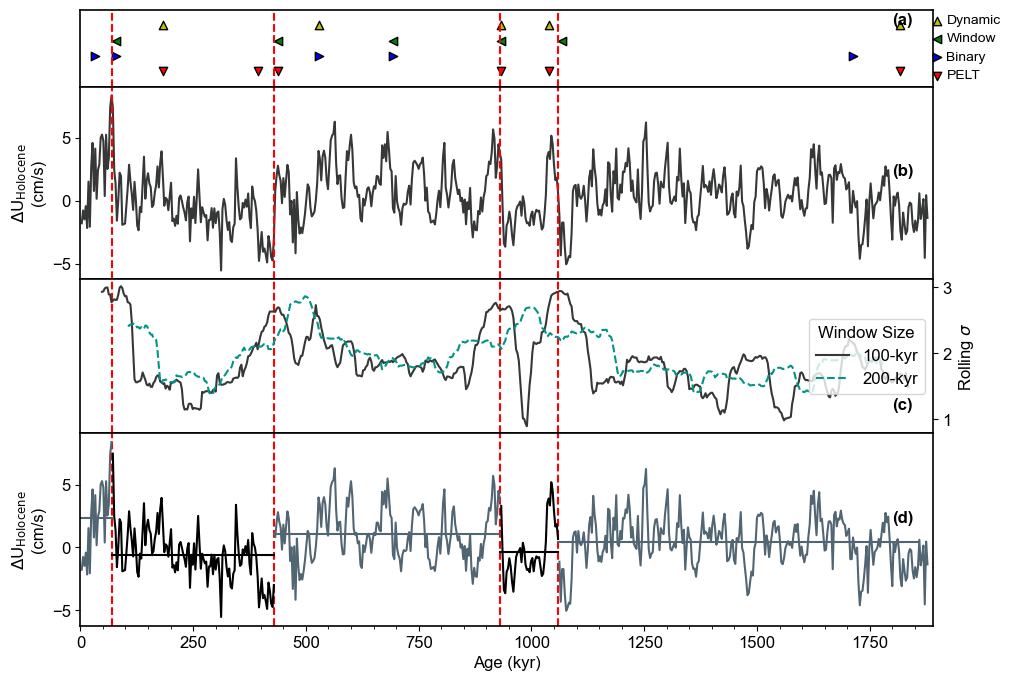

In [9]:
mpl.rcParams['axes.linewidth'] = 1.2 #set the value globally
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Arial'

f,ax = plt.subplots(4,1,sharex=True,figsize=(11,8),gridspec_kw={'height_ratios':[0.4,1,0.8,1]})
cc = 'xkcd:dark grey'
plt.subplots_adjust(hspace=0)
ax[1].plot(new,y_l,color=cc)


y = np.array(y_l)
model="rbf"
algo = rpt.Pelt(model=model).fit(y)
result = algo.predict(pen=5)
for l in result[:-1]:
    ax[0].scatter(new[l],np.ones(1)*1,color='r',marker='v',edgecolor='k')

ax[0].scatter(1900,0.7,color='r',marker='v',edgecolor='k',clip_on=False)    
ax[0].text(1920,0.7,'PELT',color='k',clip_on=False,va='center',fontsize=10)    
    
    
model = "l2"  
algo = rpt.Binseg(model=model).fit(y)
my_bkps = algo.predict(n_bkps=5)
for l in my_bkps[:-1]:
    ax[0].scatter(new[l],np.ones(1)*2,color='b',marker='>',edgecolor='k')
ax[0].scatter(1900,1.9,color='b',marker='>',edgecolor='k',clip_on=False)    
ax[0].text(1920,1.9,'Binary',color='k',clip_on=False,va='center',fontsize=10)    
    
model = "l2"  
algo = rpt.Window(width=20, model=model).fit(y)
wind = algo.predict(n_bkps=5)
for l in wind[:-1]:
    ax[0].scatter(new[l],np.ones(1)*3,color='g',marker='<',edgecolor='k')
ax[0].scatter(1900,3.1,color='g',marker='<',edgecolor='k',clip_on=False)    
ax[0].text(1920,3.1,'Window',color='k',clip_on=False,va='center',fontsize=10)  
           
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(y)
dyn = algo.predict(n_bkps=5)
for l in dyn[:-1]:
    ax[0].scatter(new[l],np.ones(1)*4,color='y',marker='^',edgecolor='k')
ax[0].scatter(1900,4.3,color='y',marker='^',edgecolor='k',clip_on=False)    
ax[0].text(1920,4.3,'Dynamic',color='k',clip_on=False,va='center',fontsize=10)  
           
ax[0].set_ylim(0,5)
ax[0].set_xlim(0,1890)
for lin in [71,430,930,1060]:
    ax[0].axvline(lin,color='r',linestyle='--')
    ax[1].axvline(lin,color='r',linestyle='--')
    ax[2].axvline(lin,color='r',linestyle='--')
    ax[3].axvline(lin,color='r',linestyle='--')
    
y_s = pd.Series(y)
ax[2].plot(new,y_s.rolling(30,center=True).std(),color=cc,label='100-kyr')
ax[2].plot(new,y_s.rolling(68,center=True).std(),color='xkcd:teal',linestyle='--',label='200-kyr')
ax[2].legend(title='Window Size',loc='right')


t1 = 71
t2 = 430
t3 = 930
t4 = 1060

new_1 = new[new<=t1]
y1 = y[new<=t1]
ax[3].plot(new_1,y1,color='xkcd:slate')
ax[3].plot([0,t1],[np.mean(y1),np.mean(y1)],color='xkcd:slate',lw=1.5)
    
new_1 = new[(new>t1)&(new<=t2)]
y1 = y[(new>t1)&(new<=t2)]
ax[3].plot(new_1,y1,color='xkcd:black')
ax[3].plot([t1,t2],[np.mean(y1),np.mean(y1)],color='k',lw=1.5)

new_1 = new[(new>t2)&(new<=t3)]
y1 = y[(new>t2)&(new<=t3)]
ax[3].plot(new_1,y1,color='xkcd:slate')
ax[3].plot([t2,t3],[np.mean(y1),np.mean(y1)],color='xkcd:slate',lw=1.5)

new_1 = new[(new>t3)&(new<=t4)]
y1 = y[(new>t3)&(new<=t4)]
ax[3].plot(new_1,y1,color='xkcd:black')
ax[3].plot([t3,t4],[np.mean(y1),np.mean(y1)],color='k',lw=1.5)

new_1 = new[new>t4]
y1 = y[new>t4]
ax[3].plot(new_1,y1,color='xkcd:slate')
ax[3].plot([t4,1860],[np.mean(y1),np.mean(y1)],color='xkcd:slate',lw=1.5)

ax[0].text(1800,4,'(a)',fontweight='bold')
ax[1].text(1800,2,'(b)',fontweight='bold')
ax[2].text(1800,1.15,'(c)',fontweight='bold')
ax[3].text(1800,2,'(d)',fontweight='bold')

    
### format
ax[0].set_yticks([])
ax[2].yaxis.set_ticks_position('right')
ax[2].yaxis.set_label_position('right')

ax[1].set_ylabel('$\mathrm{\Delta U_{Holocene}}$\n(cm/s)')
ax[2].set_ylabel('Rolling $\sigma$')
ax[3].set_ylabel('$\mathrm{\Delta U_{Holocene}}$\n(cm/s)')

ax[0].xaxis.set_minor_locator(MultipleLocator(50))
ax[-1].set_xlabel('Age (kyr)')

plt.savefig('figures/SF6_changepoint.pdf',bbox_inches='tight')#

In [ ]:
mpl.rcParams['axes.linewidth'] = 1.2 #set the value globally
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Arial'

f,ax = plt.subplots(4,1,sharex=True,figsize=(9,7),gridspec_kw={'height_ratios':[0.4,1,0.8,1]})
cc = 'xkcd:dark grey'
plt.subplots_adjust(hspace=0)
ax[1].plot(new,y_l,color=cc)


y = np.array(y_l)
model="rbf"
algo = rpt.Pelt(model=model).fit(y)
result = algo.predict(pen=5)
for l in result[:-1]:
    ax[0].scatter(new[l],np.ones(1)*1,color='r',marker='v',edgecolor='k')

ax[0].scatter(1900,0.7,color='r',marker='v',edgecolor='k',clip_on=False)    
ax[0].text(1920,0.7,'PELT',color='k',clip_on=False,va='center',fontsize=10)    
    
    
model = "l2"  
algo = rpt.Binseg(model=model).fit(y)
my_bkps = algo.predict(n_bkps=5)
for l in my_bkps[:-1]:
    ax[0].scatter(new[l],np.ones(1)*2,color='b',marker='>',edgecolor='k')
ax[0].scatter(1900,1.9,color='b',marker='>',edgecolor='k',clip_on=False)    
ax[0].text(1920,1.9,'Binary',color='k',clip_on=False,va='center',fontsize=10)    
    
model = "l2"  
algo = rpt.Window(width=20, model=model).fit(y)
wind = algo.predict(n_bkps=5)
for l in wind[:-1]:
    ax[0].scatter(new[l],np.ones(1)*3,color='g',marker='<',edgecolor='k')
ax[0].scatter(1900,3.1,color='g',marker='<',edgecolor='k',clip_on=False)    
ax[0].text(1920,3.1,'Window',color='k',clip_on=False,va='center',fontsize=10)  
           
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(y)
dyn = algo.predict(n_bkps=5)
for l in dyn[:-1]:
    ax[0].scatter(new[l],np.ones(1)*4,color='y',marker='^',edgecolor='k')
ax[0].scatter(1900,4.3,color='y',marker='^',edgecolor='k',clip_on=False)    
ax[0].text(1920,4.3,'Dynamic',color='k',clip_on=False,va='center',fontsize=10)  
           
ax[0].set_ylim(0,5)
ax[0].set_xlim(0,1890)
for lin in [71,430,930,1060]:
    ax[0].axvline(lin,color='r',linestyle='--')
    ax[1].axvline(lin,color='r',linestyle='--')
    ax[2].axvline(lin,color='r',linestyle='--')
    ax[3].axvline(lin,color='r',linestyle='--')
    
y_s = pd.Series(y)
ax[2].plot(new,y_s.rolling(30,center=True).std(),color=cc,label='100-kyr')
ax[2].plot(new,y_s.rolling(68,center=True).std(),color='xkcd:teal',linestyle='--',label='200-kyr')
ax[2].legend(title='Window Size',loc='right')


t1 = 71
t2 = 430
t3 = 930
t4 = 1060

new_1 = new[new<=t1]
y1 = y[new<=t1]
ax[3].plot(new_1,y1,color='xkcd:slate')
ax[3].plot([0,t1],[np.mean(y1),np.mean(y1)],color='xkcd:slate',lw=1.5)
    
new_1 = new[(new>t1)&(new<=t2)]
y1 = y[(new>t1)&(new<=t2)]
ax[3].plot(new_1,y1,color='xkcd:black')
ax[3].plot([t1,t2],[np.mean(y1),np.mean(y1)],color='k',lw=1.5)

new_1 = new[(new>t2)&(new<=t3)]
y1 = y[(new>t2)&(new<=t3)]
ax[3].plot(new_1,y1,color='xkcd:slate')
ax[3].plot([t2,t3],[np.mean(y1),np.mean(y1)],color='xkcd:slate',lw=1.5)

new_1 = new[(new>t3)&(new<=t4)]
y1 = y[(new>t3)&(new<=t4)]
ax[3].plot(new_1,y1,color='xkcd:black')
ax[3].plot([t3,t4],[np.mean(y1),np.mean(y1)],color='k',lw=1.5)

new_1 = new[new>t4]
y1 = y[new>t4]
ax[3].plot(new_1,y1,color='xkcd:slate')
ax[3].plot([t4,1860],[np.mean(y1),np.mean(y1)],color='xkcd:slate',lw=1.5)

ax[0].text(1800,4,'(a)',fontweight='bold')
ax[1].text(1800,2,'(b)',fontweight='bold')
ax[2].text(1800,1.15,'(c)',fontweight='bold')
ax[3].text(1800,2,'(d)',fontweight='bold')

    
### format
ax[0].set_yticks([])
ax[2].yaxis.set_ticks_position('right')
ax[2].yaxis.set_label_position('right')

ax[1].set_ylabel('$\mathrm{\Delta U_{Holocene}}$\n(cm/s)')
ax[2].set_ylabel('Rolling $\sigma$')
ax[3].set_ylabel('$\mathrm{\Delta U_{Holocene}}$\n(cm/s)')

ax[0].xaxis.set_minor_locator(MultipleLocator(50))
ax[-1].set_xlabel('Age (kyr)')

#plt.savefig('fig/Figure_5.pdf',bbox_inches='tight')#

<>:35: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid escape sequence '\m'
/var/folders/c_/cgbnj8n943z0v0kv5qjmw2s00000gn/T/ipykernel_36983/1025490512.py:35: SyntaxWarning: invalid escape sequence '\m'
  a.set_xlabel('$\mathrm{\Delta U_{Holocene}}$ (cm/s)')


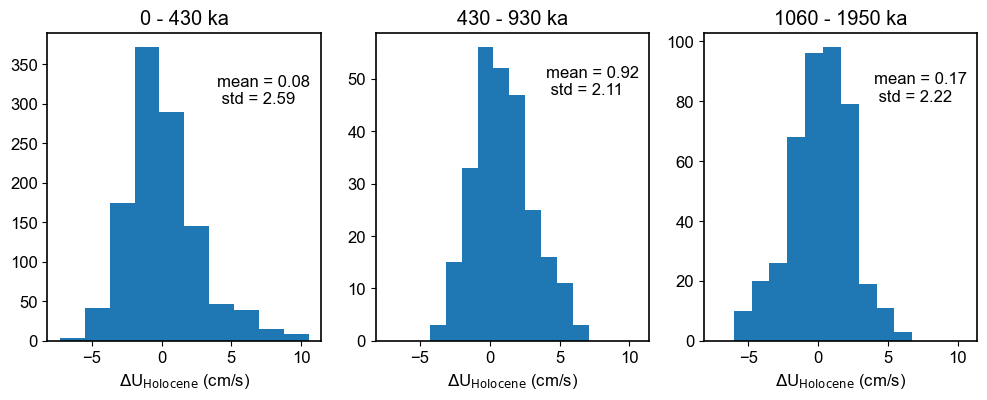

In [7]:
from scipy.stats import ttest_ind 

pre_mpt = apcomp[apcomp['LR04_age']>=1060]
y_pre = pre_mpt['dU_dhol_mccave']
n = y_pre.notnull()
y_pre = y_pre[n]

mbt = apcomp[(apcomp['LR04_age']<=930)&(apcomp['LR04_age']>=430)]
y_mbt = mbt['dU_dhol_mccave']
n = y_mbt.notnull()
y_mbt = y_mbt[n]

post = apcomp[apcomp['LR04_age']<=430]
y_post = post['dU_dhol_mccave']
n = y_post.notnull()
y_post = y_post[n]

f,ax = plt.subplots(1,3,sharex=True,figsize=(12,4))

ax[0].hist(y_post)
ax[0].text(4,300,'mean = '+str(round(np.mean(y_post),2)) + '\n std = '+str(round(np.std(y_post),2)))

ax[1].hist(y_mbt)
ax[1].text(4,47,'mean = '+str(round(np.mean(y_mbt),2)) + '\n std = '+str(round(np.std(y_mbt),2)))

ax[2].hist(y_pre)
ax[2].text(4,80,'mean = '+str(round(np.mean(y_pre),2)) + '\n std = '+str(round(np.std(y_pre),2)))

ttest_ind(y_pre,y_mbt,equal_var=False)
ax[0].set_title('0 - 430 ka')
ax[1].set_title('430 - 930 ka')
ax[2].set_title('1060 - 1950 ka')

for a in ax:
    a.set_xlabel('$\mathrm{\Delta U_{Holocene}}$ (cm/s)')
